# Random Forest Model

In [1]:
import  os
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the data

In [3]:
df = pd.read_csv('../data_preprocessing/Merged_data/002_verwaltung_with_holidays_indoor_person_counts.csv')

In [4]:
df

,DateTime,electricity_15min_diff,heating_15min_diff,is_holiday,day_of_week,hour_of_day,is_working_hour,number_of_people,Temperature,Humidity,Dewpoint,Sun Duration,Precipitation Height,Wind Speed,Wind Direction,indoor_temperature,temperature_difference
0,2022-01-01 00:00:00,0.00,0.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0,13.2,0.0
1,2022-01-01 00:15:00,1.38,5.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0,13.2,0.0
2,2022-01-01 00:30:00,1.20,5.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0,13.2,0.0
3,2022-01-01 00:45:00,1.37,5.0,True,5,0,False,0,13.2,85.0,10.7,0.0,0.0,5.0,240.0,13.2,0.0
4,2022-01-01 01:00:00,1.15,5.0,True,5,1,False,0,13.1,87.0,11.0,0.0,0.0,4.8,240.0,13.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2022-12-31 23:00:00,2.12,3.0,True,5,23,False,0,16.9,50.0,6.4,0.0,0.0,8.2,190.0,16.9,0.0
35037,2022-12-31 23:15:00,1.64,2.0,True,5,23,False,0,16.9,50.0,6.4,0.0,0.0,8.2,190.0,16.9,0.0
35038,2022-12-31 23:30:00,1.87,3.0,True,5,23,False,0,16.9,50.0,6.4,0.0,0.0,8.2,190.0,16.9,0.0
35039,2022-12-31 23:45:00,1.65,3.0,True,5,23,False,0,16.9,50.0,6.4,0.0,0.0,8.2,190.0,16.9,0.0


In [5]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S')

In [6]:
df.set_index('DateTime',inplace=True)

In [7]:
df = df.astype({'is_holiday': 'int32', 'day_of_week': 'int32', 'hour_of_day': 'int32', 'is_working_hour': 'int32'})

In [8]:
df.index.name

'DateTime'

In [9]:
df.columns

Index(['electricity_15min_diff', 'heating_15min_diff', 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction',
       'indoor_temperature', 'temperature_difference'],
      dtype='object')

In [10]:
# Define the date ranges for training and test data
train_end_date = df.index.min() + pd.DateOffset(months=9)
test_start_date = train_end_date

# Split the DataFrame
train_data = df[:train_end_date]
test_data = df[test_start_date:]

# Task1: Predict the heating energy consumption for the next 15 minutes

## Using only weather data as features

In [11]:

# Prepare the data
input_cols = [ 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'heating_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 3.8916
RMSE: 1.9727
MAE: 1.5960
R² Score: 0.1959


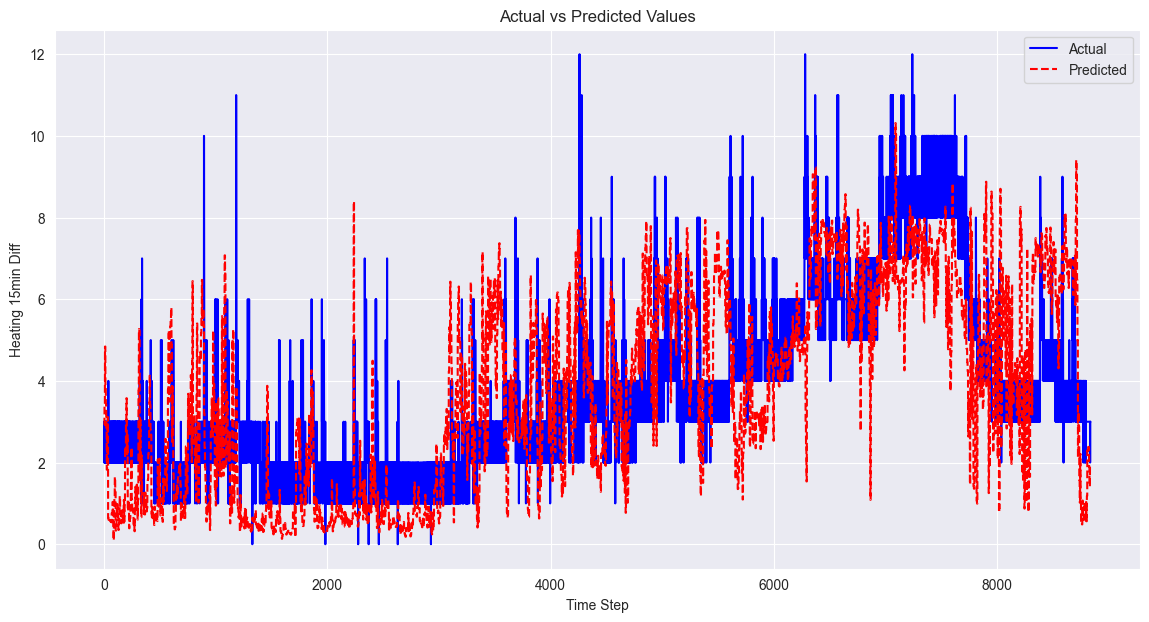

In [12]:

# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Using holidays as a feature

In [13]:

# Prepare the data
input_cols = [ 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'heating_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 3.3253
RMSE: 1.8236
MAE: 1.4863
R² Score: 0.3129


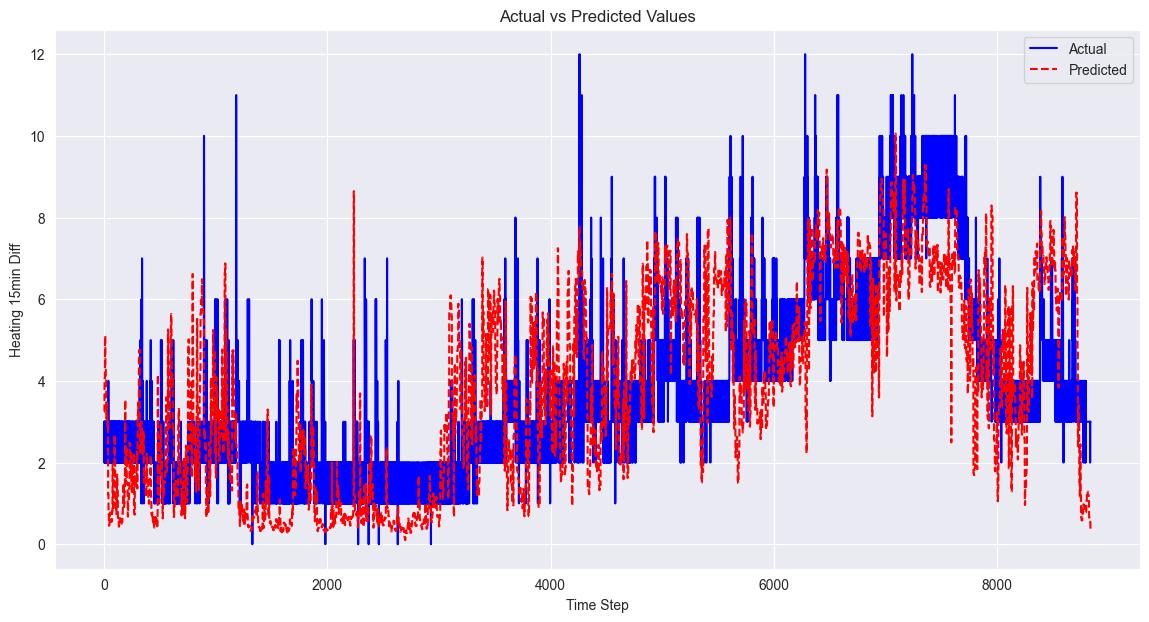

In [14]:
# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

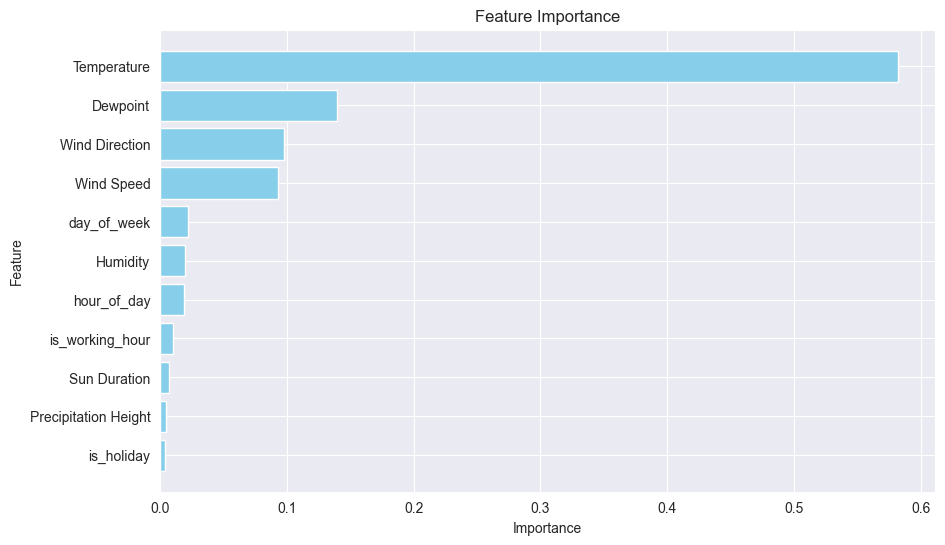

In [15]:

feature_importances = model.feature_importances_
features = input_cols

# Create a DataFrame for better visualization
df_feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=True)

# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importances['Feature'], df_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

## Using indoor features

In [16]:

# Prepare the data
input_cols = [  'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction',
       'indoor_temperature', 'temperature_difference']
target_col = 'heating_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 3.2666
RMSE: 1.8074
MAE: 1.4776
R² Score: 0.3250


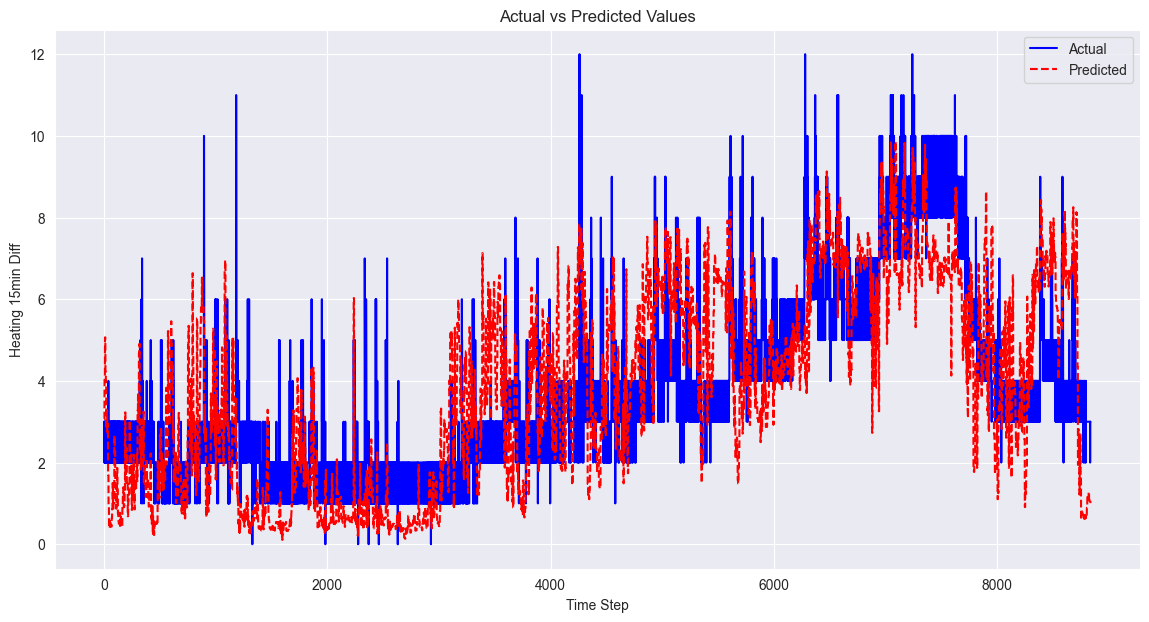

In [17]:

# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Heating 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Task2: Predict the electricity consumption for the next 15 minutes

## Using only weather data as features

In [18]:

# Prepare the data
input_cols = [ 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'electricity_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 1.1859
RMSE: 1.0890
MAE: 0.8018
R² Score: -0.1900


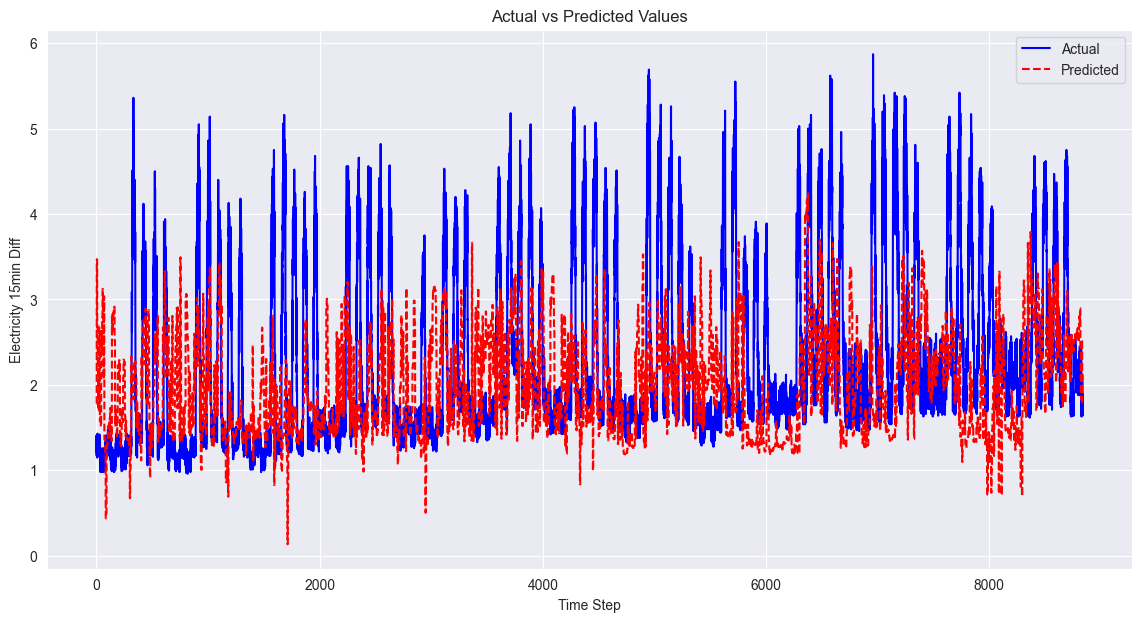

In [19]:
# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Electricity 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Using holidays as a feature

In [20]:

# Prepare the data
input_cols = [ 'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'Temperature',
       'Humidity', 'Dewpoint', 'Sun Duration', 'Precipitation Height',
       'Wind Speed', 'Wind Direction']
target_col = 'electricity_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 0.6611
RMSE: 0.8131
MAE: 0.4684
R² Score: 0.3366


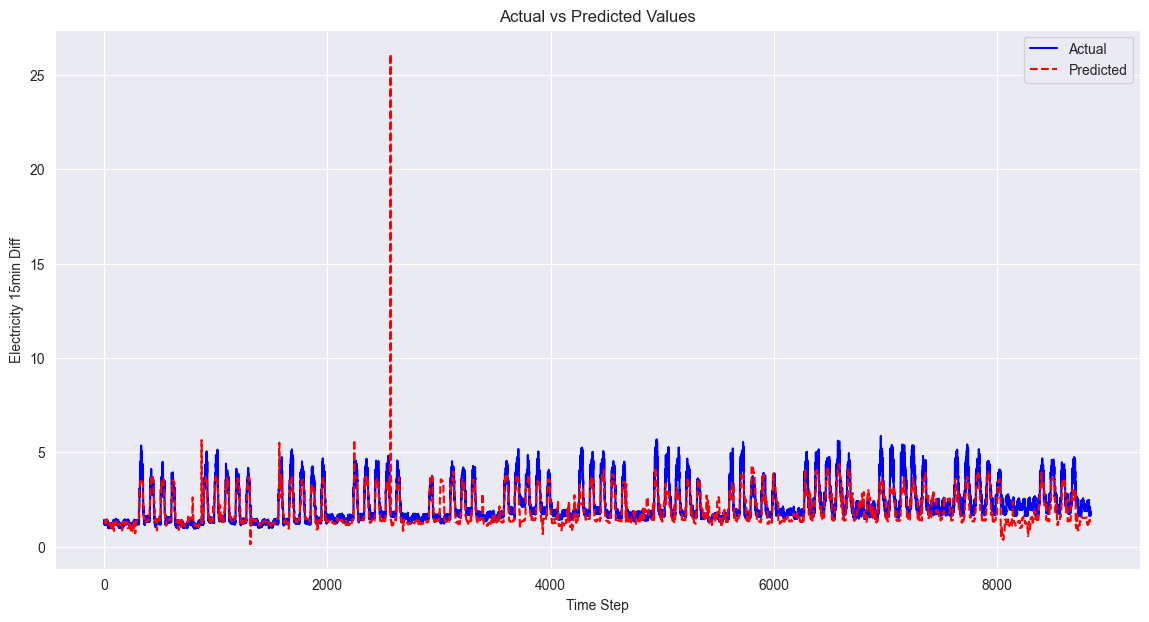

In [21]:
# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Electricity 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Using indoor features

In [22]:
# Prepare the data
input_cols = [  'is_holiday',
       'day_of_week', 'hour_of_day', 'is_working_hour', 'number_of_people',
       'Temperature', 'Humidity', 'Dewpoint', 'Sun Duration',
       'Precipitation Height', 'Wind Speed', 'Wind Direction',
       'indoor_temperature', 'temperature_difference']
target_col = 'electricity_15min_diff'

# Assuming train_data and test_data are already loaded DataFrames
X_train = train_data[input_cols]
y_train = train_data[target_col]
X_test = test_data[input_cols]
y_test = test_data[target_col]

# Initialize the model
model = RandomForestRegressor(n_estimators=200, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R² Score: {r2:.4f}')

MSE: 0.6652
RMSE: 0.8156
MAE: 0.4687
R² Score: 0.3325


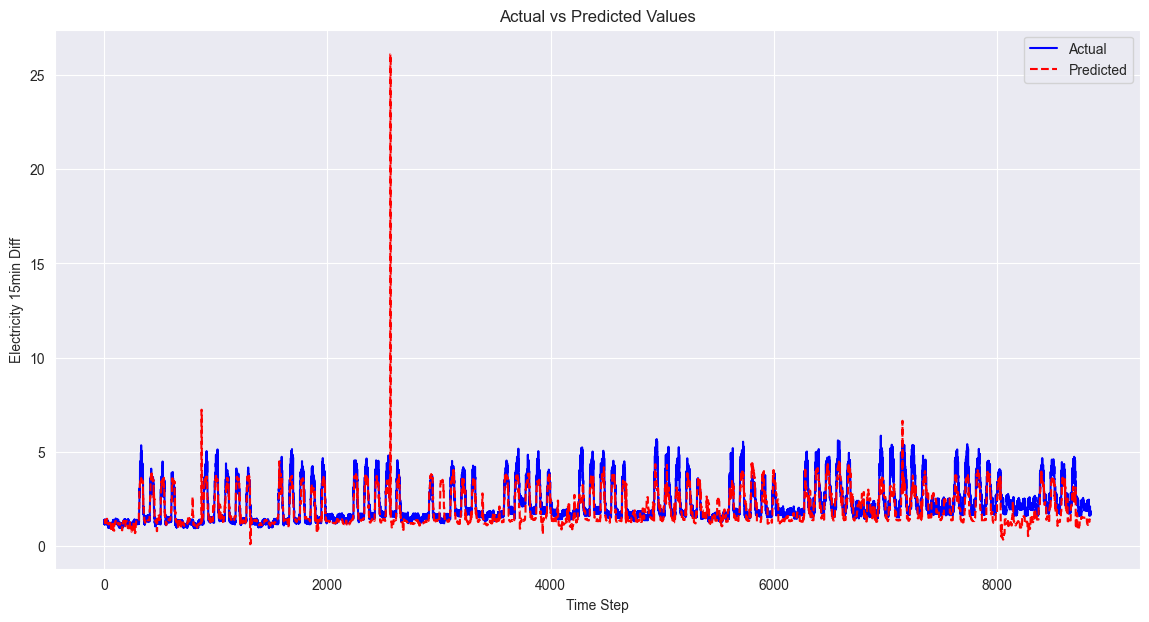

In [23]:
# Assuming `y_test` and `y_pred` are your actual and predicted values respectively

# Convert to numpy arrays if they are not already
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual', color='b')
plt.plot(y_pred, label='Predicted', color='r', linestyle='--')
plt.xlabel('Time Step')
plt.ylabel('Electricity 15min Diff')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()